In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

print("First few rows of the dataset:")
print(df.head())

print("Missing values:")
print(df.isnull().sum())

print("Data Types:")
print(df.dtypes)

print("Summary Statistics:")
print(df.describe())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome        

In [ ]:
df.fillna(0, inplace=True)
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature Matrix (X):")
print(X.head())

print("Target Variable (y):")
print(y.head())

Feature Matrix (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Target Variable (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
import numpy as np
np.random.seed(42)

train_size = int(0.7 * len(X))
indices = np.random.permutation(len(X))

X_train, X_test = X.iloc[indices[:train_size]], X.iloc[indices[train_size:]]
y_train, y_test = y.iloc[indices[:train_size]], y.iloc[indices[train_size:]]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [ ]:
import numpy as np

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

distance = euclidean_distance(point1, point2)
print("Euclidean Distance:", distance)

Euclidean Distance: 5.196152422706632


In [ ]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))
print(euclidean_distance)

<function euclidean_distance at 0x78b0f8c65630>


In [ ]:
def predict_class(X_train, y_train, query_point, k):
    distances = [euclidean_distance(query_point, point) for point in X_train.values]
    neighbors = np.argsort(distances)[:k]
    return y_train.iloc[neighbors].mode()[0]

query_point = X_test.iloc[0]
k = 3
predicted_class = predict_class(X_train, y_train, query_point, k)
print("Predicted Class for Query Point:", predicted_class)

def predict_all(X_train, y_train, X_test, k):
    return np.array([predict_class(X_train, y_train, point, k) for point in X_test.values])

y_pred = predict_all(X_train, y_train, X_test, k)
print("Predicted Labels for Test Data:", y_pred)

Predicted Class for Query Point: 0
Predicted Labels for Test Data: [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 0]


In [ ]:
def evaluate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = (correct_predictions / len(y_true)) * 100
    return accuracy

accuracy = evaluate_accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 70.13%


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Feature Matrix (X):")
print(X_scaled[:5])

Scaled Feature Matrix (X):
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [ ]:
y_pred = predict_all(X_train, y_train, X_test, k=3)
print("Predicted Labels:", y_pred)

Predicted Labels: [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 0]


In [ ]:
accuracy = evaluate_accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 70.13%


In [ ]:
y_pred_original = predict_all(X_train, y_train, X_test, k=3)
accuracy_original = evaluate_accuracy(y_test, y_pred_original)
print(f'Accuracy on Original Dataset: {accuracy_original:.2f}%')

Accuracy on Original Dataset: 70.13%


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred_scaled = predict_all(X_train, y_train, X_test, k=3)
accuracy_scaled = evaluate_accuracy(y_test, y_pred_scaled)
print(f'Accuracy on Scaled Dataset: {accuracy_scaled:.2f}%')

Accuracy on Scaled Dataset: 70.13%


In [ ]:
print("Comparison of Results:")
print(f"Original Accuracy: {accuracy_original:.2f}%")
print(f"Scaled Accuracy: {accuracy_scaled:.2f}%")

if accuracy_scaled > accuracy_original:
    print("Scaling improved performance.")
else:
    print("Scaling did not improve performance.")


Comparison of Results:
Original Accuracy: 70.13%
Scaled Accuracy: 70.13%
Scaling did not improve performance.


Scaling often improves the kNN model's performance by ensuring that all features contribute equally to the distance measure.
Unscaled data might lead to biased predictions if some features have larger numeric ranges than others.

In [ ]:
import time
from sklearn.preprocessing import StandardScaler

# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate accuracy
def evaluate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = (correct_predictions / len(y_true)) * 100
    return accuracy

# Record accuracy and time for original dataset
accuracies_original = []
times_original = []

# Record accuracy and time for scaled dataset
accuracies_scaled = []
times_scaled = []

for k in range(1, 16):
    # Measure time for original dataset
    start_time = time.time()
    y_pred_original = predict_all(X_train, y_train, X_test, k)  # Predict for original data
    times_original.append(time.time() - start_time)
    accuracies_original.append(evaluate_accuracy(y_test, y_pred_original))

    # Measure time for scaled dataset
    start_time = time.time()
    y_pred_scaled = predict_all(X_train, y_train, X_test, k)  # Predict for scaled data
    times_scaled.append(time.time() - start_time)
    accuracies_scaled.append(evaluate_accuracy(y_test, y_pred_scaled))

# Print results
print("Accuracies for Original Dataset:", accuracies_original)
print("Accuracies for Scaled Dataset:", accuracies_scaled)
print("Times for Original Dataset:", times_original)
print("Times for Scaled Dataset:", times_scaled)

Accuracies for Original Dataset: [64.93506493506493, 71.42857142857143, 70.12987012987013, 74.89177489177489, 71.42857142857143, 76.19047619047619, 73.16017316017316, 74.89177489177489, 74.45887445887446, 73.59307359307358, 72.72727272727273, 73.16017316017316, 74.02597402597402, 74.89177489177489, 73.59307359307358]
Accuracies for Scaled Dataset: [64.93506493506493, 71.42857142857143, 70.12987012987013, 74.89177489177489, 71.42857142857143, 76.19047619047619, 73.16017316017316, 74.89177489177489, 74.45887445887446, 73.59307359307358, 72.72727272727273, 73.16017316017316, 74.02597402597402, 74.89177489177489, 73.59307359307358]
Times for Original Dataset: [1.0003106594085693, 0.8540060520172119, 0.872520923614502, 1.6092102527618408, 0.8576159477233887, 1.0015692710876465, 1.478292465209961, 0.8812201023101807, 0.8608462810516357, 0.8629779815673828, 1.1576509475708008, 0.972578763961792, 1.8859479427337646, 1.2416105270385742, 0.880436897277832]
Times for Scaled Dataset: [0.8874027729

Scaled Dataset - Accuracies: [64.93506493506493, 71.42857142857143, 70.12987012987013, 74.89177489177489, 71.42857142857143, 76.19047619047619, 73.16017316017316, 74.89177489177489, 74.45887445887446, 73.59307359307358, 72.72727272727273, 73.16017316017316, 74.02597402597402, 74.89177489177489, 73.59307359307358]
Scaled Dataset - Times: [0.8855748176574707, 0.8792300224304199, 0.8693580627441406, 0.891620397567749, 0.873882532119751, 1.315215826034546, 1.718379020690918, 1.540635108947754, 0.8683366775512695, 0.8653838634490967, 0.8747158050537109, 0.8536477088928223, 0.8647346496582031, 0.8630127906799316, 0.8606312274932861]


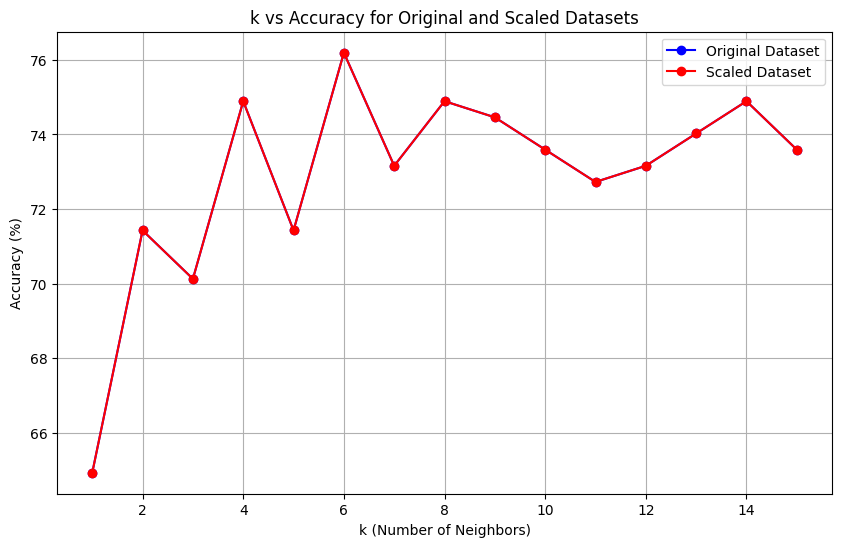

In [ ]:
import matplotlib.pyplot as plt

# Plot k vs Accuracy for original and scaled datasets
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracies_original, label="Original Dataset", color='blue', marker='o')
plt.plot(range(1, 16), accuracies_scaled, label="Scaled Dataset", color='red', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()

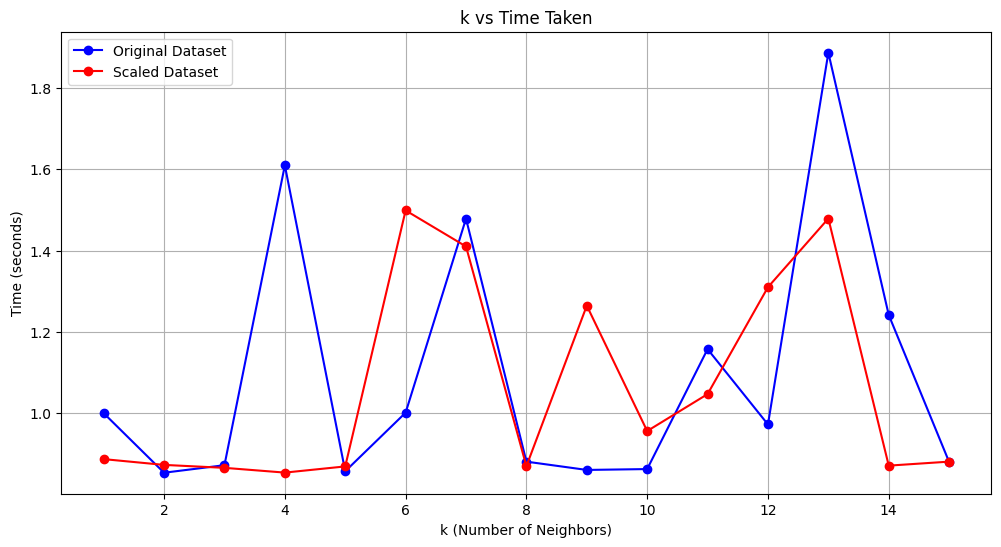

In [ ]:
# Plot k vs Time Taken
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), times_original, label="Original Dataset", color='blue', marker='o')
plt.plot(range(1, 16), times_scaled, label="Scaled Dataset", color='red', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)
plt.show()

Challenges:

Computational inefficiency when working with large datasets due to the need to compute distances for all points.
Sensitivity to irrelevant or noisy features, especially in high-dimensional data.
Curse of dimensionality causing all data points to appear equidistant in high dimensions.
Memory-intensive as the entire dataset needs to be stored for predictions.
Difficulty in handling imbalanced datasets where majority class dominates predictions.

Strategies:

Use approximate nearest neighbor algorithms like KD-Trees, Ball Trees, or Locality-Sensitive Hashing (LSH).
Perform dimensionality reduction techniques such as Principal Component Analysis (PCA) or t-SNE.
Preprocess data with feature selection to remove irrelevant or redundant features.
Implement data sampling techniques (e.g., SMOTE) to handle class imbalance.
Optimize hyperparameters (e.g., choosing the best k) through cross-validation.